## Compare if we get more information from the first or third column in the mixing matrix estimation if we initialize completly at random


In [2]:
from models.ICA_EM import *
from models.dgp import *
from models.metrics import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import importlib, sys
importlib.reload(sys.modules['models.dgp'])
importlib.reload(sys.modules['models.metrics'])
importlib.reload(sys.modules['models.ICA_EM'])
import tqdm
from sklearn.metrics import mean_squared_error as mse

In [2]:
n = 10000
J = 6
I = 5

def norm_funtion(A, col):
    # [0,0], [1,1] must be one
    if A[0, col] != 0:
        A_0 = A[:, col] / A[0, col]
    else:
        A_0 = A[:, col]
    return A_0

In [3]:
def percentage_first_column_is_better(treatment_true, treatment_first, treatment_third):
    # requires numpy arrays

    deviation_first = np.abs(treatment_first - treatment_true)
    deviation_third = np.abs(treatment_third - treatment_true)
    return np.sum(deviation_first < deviation_third)/len(deviation_first)

    

## True A VarEM


In [23]:
true_treatment = []
est_treatment_first = []
est_treatment_third = []
data = dgp(noise_dict= {"loc" : 0, "scale" : 0}, prior= {"loc" : 0, "scale" : 1/np.sqrt(2)})
for i in tqdm.tqdm(range(200)):
    data.generate_data(n,I, J, random_state=i)
    est = VarEM(update_sigma=False, true_A=data.mixing_matrix_observed)
    true_treatment.append(data.treatment_effect)
    est.fit(data.data_observed,J, noise_params= {"mean" : 0, "std" : 1}, progress_bar=False)
    est_treatment_first.append(norm_funtion(est.A, 0)[1])
    est_treatment_third.append(norm_funtion(est.A, 2)[1])

df = pd.DataFrame(
    {
        "true_treatment": true_treatment,
        "est_treatment_first": est_treatment_first,
        "est_treatment_third": est_treatment_third,
    }
)
#df.to_csv("results/first_vs_third_VarEM_true_A_200.csv", index=False)


100%|██████████| 200/200 [2:29:13<00:00, 44.77s/it]  


In [4]:
df = pd.read_csv("results/first_vs_third_VarEM_true_A_200.csv")

Text(0.5, 0.98, 'First vs Third column VarEM, true A init')

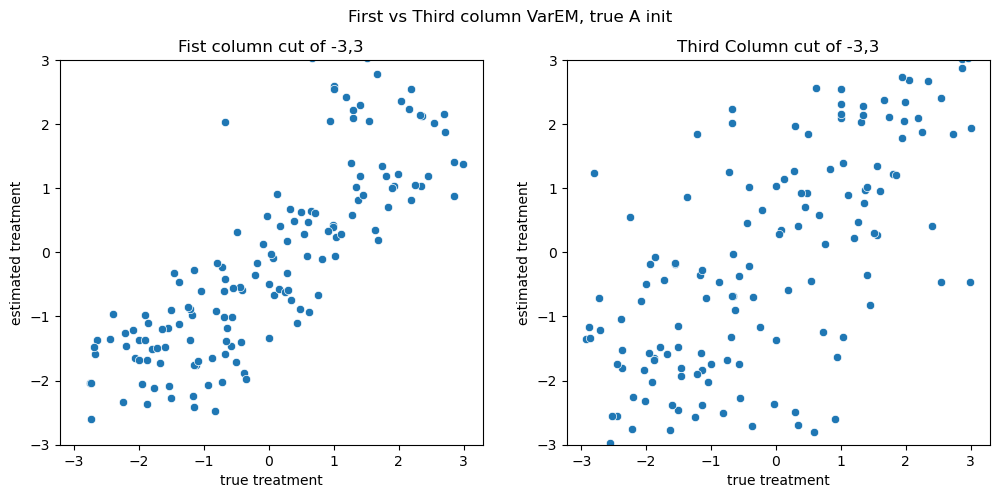

In [5]:
fig, ax = plt.subplots(1,2, figsize = (12,5))
sns.scatterplot(x = "true_treatment", y = "est_treatment_first", data = df,ax = ax[0])
ax[0].set_title("Potential treatment column cut of -3,3")

ax[0].set_ylabel("estimated treatment")
ax[0].set_xlabel("true treatment")
ax[0].set_ylim(-3,3)

sns.scatterplot(x = "true_treatment", y = "est_treatment_third", data = df,ax = ax[1])
ax[1].set_title("Potential confounder column cut of -3,3")
ax[1].set_ylabel("estimated treatment")
ax[1].set_ylim(-3,3)


ax[1].set_xlabel("true treatment")
fig.suptitle("First vs Third column VarEM, true A init")


In [6]:
# root mse
print("Root MSE first column", np.sqrt(mse(df.true_treatment, df.est_treatment_first)))
print("Root MSE third column", np.sqrt(mse(df.true_treatment, df.est_treatment_third)))
# mean absolute error
print("Mean absolute error first column", np.mean(np.abs(df.true_treatment -df.est_treatment_first)))
print("Mean absolute error first column", np.mean(np.abs(df.true_treatment -df.est_treatment_third)))
# std of the error
print("Std of the error first column", np.std(df.true_treatment -df.est_treatment_first))
print("Std of the error third column", np.std(df.true_treatment -df.est_treatment_third))

print("Percentage first column is better", percentage_first_column_is_better(df.true_treatment, df.est_treatment_first,df.est_treatment_third))

Root MSE first column 10.504405677945416
Root MSE third column 8.639971248756199
Mean absolute error first column 2.6108127716520237
Mean absolute error first column 3.6650352172204066
Std of the error first column 10.446223371524683
Std of the error third column 8.639013676977232
Percentage first column is better 0.555


### No A VarEM

In [4]:
true_treatment = []
est_treatment_first = []
est_treatment_third = []
data = dgp(noise_dict= {"loc" : 0, "scale" : 0}, prior= {"loc" : 0, "scale" : 1/np.sqrt(2)})
for i in tqdm.tqdm(range(200)):
    data.generate_data(n,I, J, random_state=i)
    est = VarEM(update_sigma=False, true_A=None)
    true_treatment.append(data.treatment_effect)
    est.fit(data.data_observed,J, noise_params= {"mean" : 0, "std" : 1}, progress_bar=False)
    est_treatment_first.append(norm_funtion(est.A, 0)[1])
    est_treatment_third.append(norm_funtion(est.A, 2)[1])

df = pd.DataFrame(
    {
        "true_treatment": true_treatment,
        "est_treatment_first": est_treatment_first,
        "est_treatment_third": est_treatment_third,
    }
)
#df.to_csv("results/first_vs_third_VarEM_no_A_200.csv", index=False)
    

100%|██████████| 200/200 [2:26:47<00:00, 44.04s/it]  


Text(0.5, 0.98, 'First vs Third column VarEM, no init')

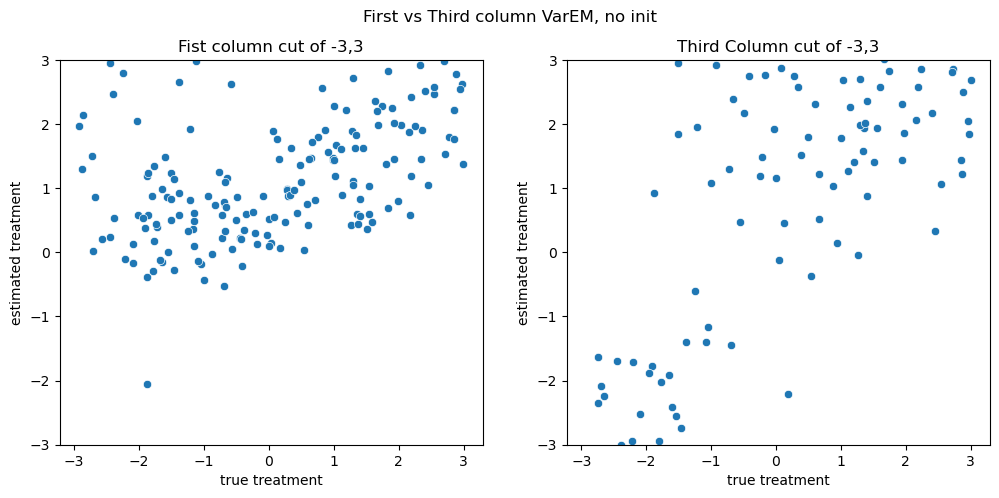

In [56]:
df = pd.read_csv("results/first_vs_third_VarEM_no_A_200.csv")
fig, ax = plt.subplots(1,2, figsize = (12,5))
sns.scatterplot(x = "true_treatment", y = "est_treatment_first", data = df,ax = ax[0])
ax[0].set_title("Fist column cut of -3,3")

ax[0].set_ylabel("estimated treatment")
ax[0].set_xlabel("true treatment")
ax[0].set_ylim(-3,3)

sns.scatterplot(x = "true_treatment", y = "est_treatment_third", data = df,ax = ax[1])
ax[1].set_title("Third Column cut of -3,3")
ax[1].set_ylabel("estimated treatment")
ax[1].set_ylim(-3,3)

ax[1].set_xlabel("true treatment")
fig.suptitle("First vs Third column VarEM, no init")


In [57]:
# root mse
print("Root MSE first column", np.sqrt(mse(df.true_treatment, df.est_treatment_first)))
print("Root MSE third column", np.sqrt(mse(df.true_treatment, df.est_treatment_third)))
# mean absolute error
print("Mean absolute error first column", np.mean(np.abs(df.true_treatment -df.est_treatment_first)))
print("Mean absolute error first column", np.mean(np.abs(df.true_treatment -df.est_treatment_third)))
# std of the error
print("Std of the error first column", np.std(df.true_treatment -df.est_treatment_first))
print("Std of the error third column", np.std(df.true_treatment -df.est_treatment_third))
print("Percentage first column is better", percentage_first_column_is_better(df.true_treatment, df.est_treatment_first,df.est_treatment_third))

Root MSE first column 295.8380264962197
Root MSE third column 60.83626417037395
Mean absolute error first column 24.95069754090069
Mean absolute error first column 16.258086312046444
Std of the error first column 294.8139185073525
Std of the error third column 60.83305827504294
Percentage first column is better 0.735


### No init CausalVarEM



In [100]:
true_treatment = []
est_treatment_first = []
est_treatment_third = []
data = dgp(noise_dict= {"loc" : 0, "scale" : 0}, prior= {"loc" : 0, "scale" : 1/np.sqrt(2)})
for i in tqdm.tqdm(range(100)):
    data.generate_data(n,I, J, random_state=i)
    est = CausalVarEM(update_sigma=False, true_A=None)
    true_treatment.append(data.treatment_effect)
    est.fit(data.data_observed,J, noise_params= {"mean" : 0, "std" : 1}, progress_bar=False)
    est_treatment_first.append(norm_funtion(est.A, 0)[1])
    est_treatment_third.append(norm_funtion(est.A, 2)[1])
df = pd.DataFrame(
    {
        "true_treatment": true_treatment,
        "est_treatment_first": est_treatment_first,
        "est_treatment_third": est_treatment_third,
    }
)
df.to_csv("results/first_vs_third_CausalVarEM_no_A.csv", index=False)

100%|██████████| 100/100 [1:17:37<00:00, 46.57s/it]


Text(0.5, 0.98, 'First vs Third column CausalVarEM, no A init')

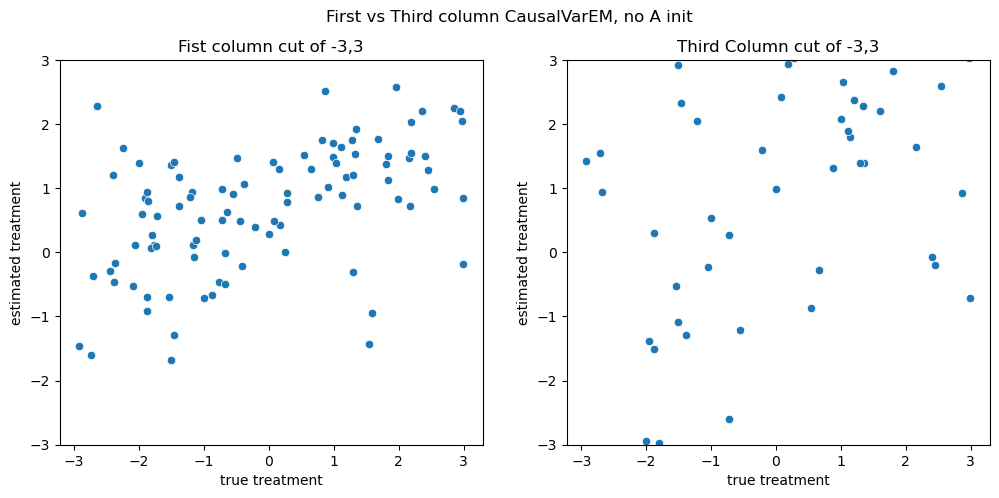

In [58]:
df = pd.read_csv("results/first_vs_third_CausalVarEM_no_A.csv")
fig, ax = plt.subplots(1,2, figsize = (12,5))
sns.scatterplot(x = "true_treatment", y = "est_treatment_first", data = df,ax = ax[0])
ax[0].set_title("Fist column cut of -3,3")

ax[0].set_ylabel("estimated treatment")
ax[0].set_xlabel("true treatment")
ax[0].set_ylim(-3,3)

sns.scatterplot(x = "true_treatment", y = "est_treatment_third", data = df,ax = ax[1])
ax[1].set_title("Third Column cut of -3,3")
ax[1].set_ylabel("estimated treatment")
ax[1].set_ylim(-3,3)

ax[1].set_xlabel("true treatment")
fig.suptitle("First vs Third column CausalVarEM, no A init")


In [59]:
# root mse
print("Root MSE first column", np.sqrt(mse(df.true_treatment, df.est_treatment_first)))
print("Root MSE third column", np.sqrt(mse(df.true_treatment, df.est_treatment_third)))
# mean absolute error
print("Mean absolute error first column", np.mean(np.abs(df.true_treatment -df.est_treatment_first)))
print("Mean absolute error first column", np.mean(np.abs(df.true_treatment -df.est_treatment_third)))
# std of the error
print("Std of the error first column", np.std(df.true_treatment -df.est_treatment_first))
print("Std of the error third column", np.std(df.true_treatment -df.est_treatment_third))

print("Percentage first column is better", percentage_first_column_is_better(df.true_treatment, df.est_treatment_first,df.est_treatment_third))

Root MSE first column 1.6511245372750576
Root MSE third column 36.810521290062375
Mean absolute error first column 1.2979090966990148
Mean absolute error first column 9.567732725300278
Std of the error first column 1.4561413909537229
Std of the error third column 36.784943500804516
Percentage first column is better 0.77


## True A CausalVarEM




In [4]:
true_treatment = []
est_treatment_first = []
est_treatment_third = []
data = dgp(noise_dict= {"loc" : 0, "scale" : 0}, prior= {"loc" : 0, "scale" : 1/np.sqrt(2)})
for i in tqdm.tqdm(range(100)):
    data.generate_data(n,I, J, random_state=i)
    est = CausalVarEM(update_sigma=False, true_A=data.mixing_matrix_observed)
    true_treatment.append(data.treatment_effect)
    est.fit(data.data_observed,J, noise_params= {"mean" : 0, "std" : 1}, progress_bar=False)
    est_treatment_first.append(norm_funtion(est.A, 0)[1])
    est_treatment_third.append(norm_funtion(est.A, 2)[1])
df = pd.DataFrame(
    {
        "true_treatment": true_treatment,
        "est_treatment_first": est_treatment_first,
        "est_treatment_third": est_treatment_third,
    }
)
#df.to_csv("results/first_vs_third_CausalVarEM_true_A.csv", index=False)
    


100%|██████████| 100/100 [1:14:07<00:00, 44.48s/it]


Text(0.5, 0.98, 'First vs Third column CausalVarEM, true A init')

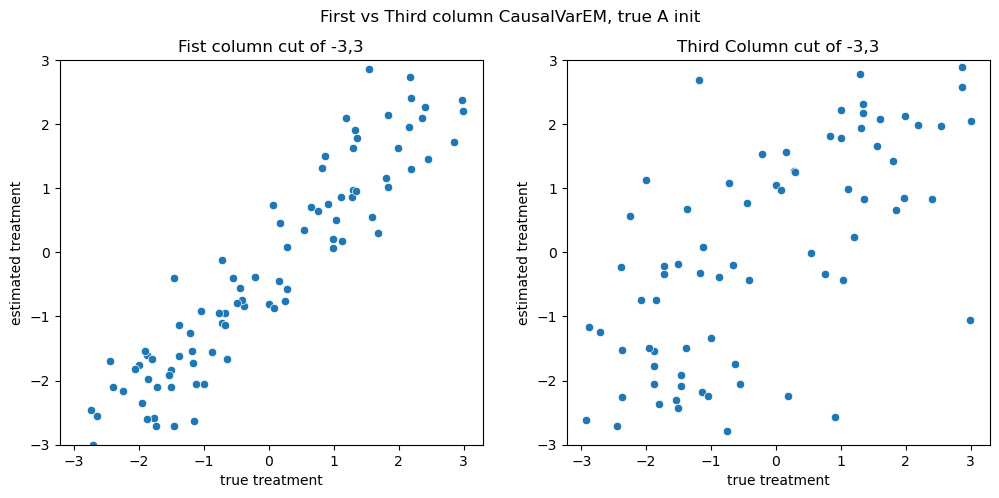

In [60]:
df = pd.read_csv("results/first_vs_third_CausalVarEM_true_A.csv")
fig, ax = plt.subplots(1,2, figsize = (12,5))
sns.scatterplot(x = "true_treatment", y = "est_treatment_first", data = df,ax = ax[0])
ax[0].set_title("Fist column cut of -3,3")

ax[0].set_ylabel("estimated treatment")
ax[0].set_xlabel("true treatment")
ax[0].set_ylim(-3,3)

sns.scatterplot(x = "true_treatment", y = "est_treatment_third", data = df,ax = ax[1])
ax[1].set_title("Third Column cut of -3,3")
ax[1].set_ylabel("estimated treatment")
ax[1].set_ylim(-3,3)

ax[1].set_xlabel("true treatment")
fig.suptitle("First vs Third column CausalVarEM, true A init")


In [61]:
# root mse
print("Root MSE first column", np.sqrt(mse(df.true_treatment, df.est_treatment_first)))
print("Root MSE third column", np.sqrt(mse(df.true_treatment, df.est_treatment_third)))
# mean absolute error
print("Mean absolute error first column", np.mean(np.abs(df.true_treatment -df.est_treatment_first)))
print("Mean absolute error first column", np.mean(np.abs(df.true_treatment -df.est_treatment_third)))
# std of the error
print("Std of the error first column", np.std(df.true_treatment -df.est_treatment_first))
print("Std of the error third column", np.std(df.true_treatment -df.est_treatment_third))

print("Percentage first column is better", percentage_first_column_is_better(df.true_treatment, df.est_treatment_first,df.est_treatment_third))

Root MSE first column 0.763295182278522
Root MSE third column 3.3396953095972535
Mean absolute error first column 0.6186587064088943
Mean absolute error first column 2.023797185849807
Std of the error first column 0.7002006425327295
Std of the error third column 3.3009733936583716
Percentage first column is better 0.72
